<a href="https://colab.research.google.com/github/gyu-bin/mid_first_team/blob/mgb_project/carbon_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install koreanize-matplotlib

In [18]:
import pandas as pd

# 1. CSV 파일 불러오기
df = pd.read_csv('/content/owid-co2-data.csv')

# 2. 데이터 기본 확인
print("원본 데이터 형태:", df.shape)
print(df.head())
print(df.info())

# 3. 각 열의 결측치 개수 확인
missing_counts = df.isnull().sum()
print("열별 결측치 개수:")
print(missing_counts)

# 4. 결측치가 있는 행 제거 (행 기준으로 결측치 제거)
df_clean = df.dropna()

# 5. 전처리 후 데이터 확인
print("전처리 후 데이터 형태:", df_clean.shape)
print(df_clean.head())


원본 데이터 형태: (25989, 60)
  iso_code      country  year    co2  co2_per_capita  trade_co2  cement_co2  \
0      AFG  Afghanistan  1949  0.015           0.002        NaN         NaN   
1      AFG  Afghanistan  1950  0.084           0.011        NaN         NaN   
2      AFG  Afghanistan  1951  0.092           0.012        NaN         NaN   
3      AFG  Afghanistan  1952  0.092           0.012        NaN         NaN   
4      AFG  Afghanistan  1953  0.106           0.013        NaN         NaN   

   cement_co2_per_capita  coal_co2  coal_co2_per_capita  ...  \
0                    NaN     0.015                0.002  ...   
1                    NaN     0.021                0.003  ...   
2                    NaN     0.026                0.003  ...   
3                    NaN     0.032                0.004  ...   
4                    NaN     0.038                0.005  ...   

   ghg_excluding_lucf_per_capita  methane  methane_per_capita  nitrous_oxide  \
0                            NaN     

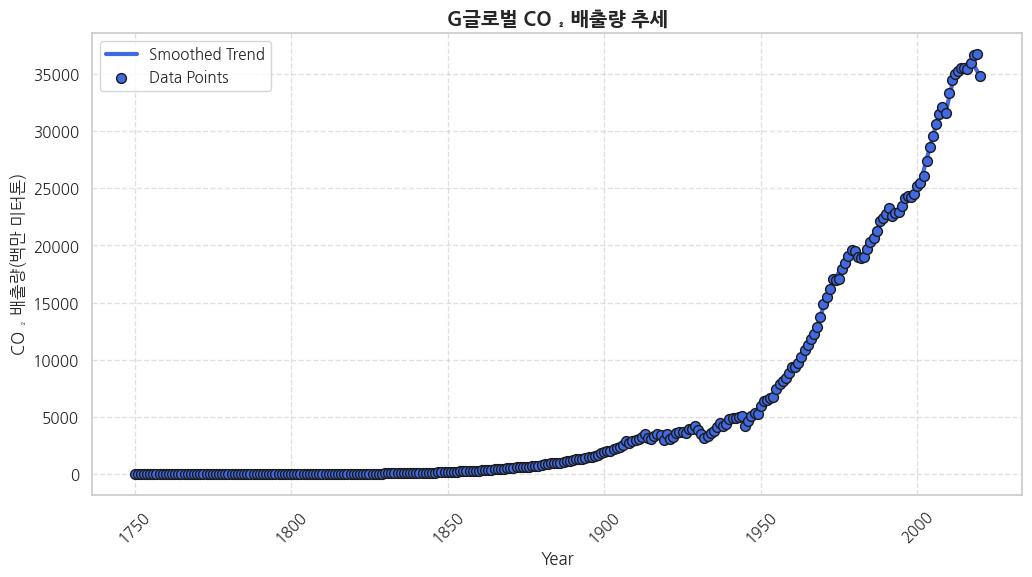

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline  # Spline 보간을 위한 모듈
import koreanize_matplotlib

# 1. CSV 파일 불러오기
df = pd.read_csv('/content/owid-co2-data.csv')

# 2. 필요한 열에서 결측치 제거 (year, country, co2)
required_cols = ['year', 'country', 'co2']
df_clean = df.dropna(subset=required_cols)

# 3. 전 세계 배출량 데이터 추출
if 'World' in df_clean['country'].unique():
    df_world = df_clean[df_clean['country'] == 'World']
else:
    df_world = df_clean.groupby('year', as_index=False)['co2'].sum()

# 4. 연도 순으로 정렬
df_world = df_world.sort_values('year')

# 5. 데이터 준비: x = 연도, y = CO₂ 배출량
x = df_world['year'].values
y = df_world['co2'].values

# 6. Spline 보간으로 부드러운 곡선 생성
#    촘촘한 점의 개수를 300에서 100으로 줄여서 여유로운 곡선 생성
x_smooth = np.linspace(x.min(), x.max(), 100)
spline = make_interp_spline(x, y, k=3)  # 3차 (cubic) spline
y_smooth = spline(x_smooth)

# 7. 시각화: 부드러운 곡선과 원래 데이터 포인트 표시
plt.figure(figsize=(12, 6))
plt.plot(x_smooth, y_smooth, color='royalblue', linewidth=3, label='Smoothed Trend')
plt.scatter(x, y, color='royalblue', edgecolor='k', s=50, zorder=5, label='Data Points')
plt.title('G글로벌 CO ₂ 배출량 추세', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO ₂ 배출량(백만 미터톤)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


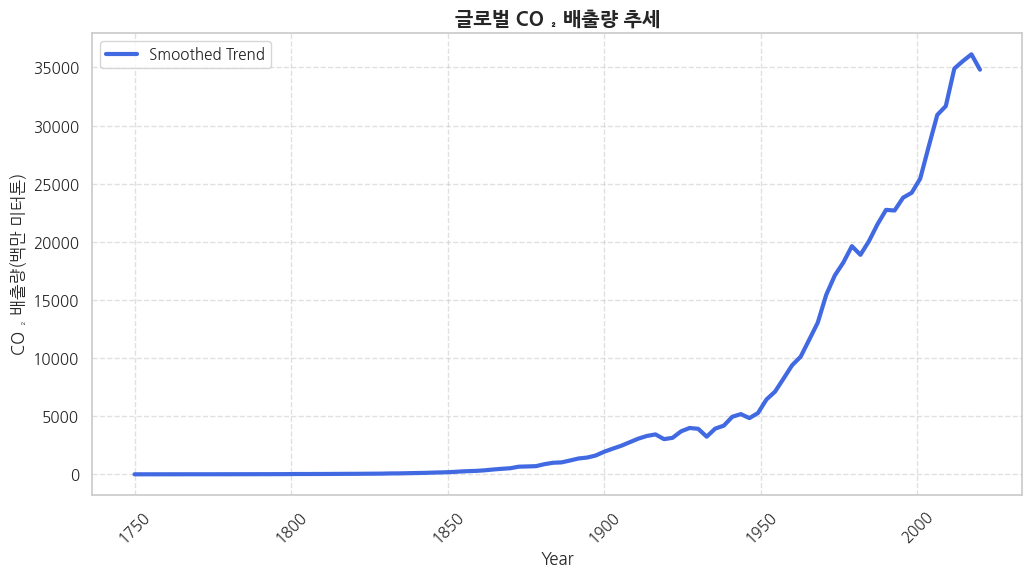

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import koreanize_matplotlib

# 1. CSV 파일 불러오기
df = pd.read_csv('/content/owid-co2-data.csv')

# 2. 필요한 열에서 결측치 제거 (year, country, co2)
required_cols = ['year', 'country', 'co2']
df_clean = df.dropna(subset=required_cols)

# 3. 전 세계 배출량 데이터 추출
if 'World' in df_clean['country'].unique():
    df_world = df_clean[df_clean['country'] == 'World']
else:
    df_world = df_clean.groupby('year', as_index=False)['co2'].sum()

# 4. 연도 순으로 정렬
df_world = df_world.sort_values('year')

# 5. 데이터 준비: x = 연도, y = CO₂ 배출량
x = df_world['year'].values
y = df_world['co2'].values

# 6. Spline 보간으로 부드러운 곡선 생성
x_smooth = np.linspace(x.min(), x.max(), 100)
spline = make_interp_spline(x, y, k=3)  # 3차 (cubic) spline
y_smooth = spline(x_smooth)

# 7. 시각화: 부드러운 곡선만 표시 (동그라미 제거)
plt.figure(figsize=(12, 6))
plt.plot(x_smooth, y_smooth, color='royalblue', linewidth=3, label='Smoothed Trend')
plt.title('글로벌 CO ₂ 배출량 추세', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO ₂ 배출량(백만 미터톤)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



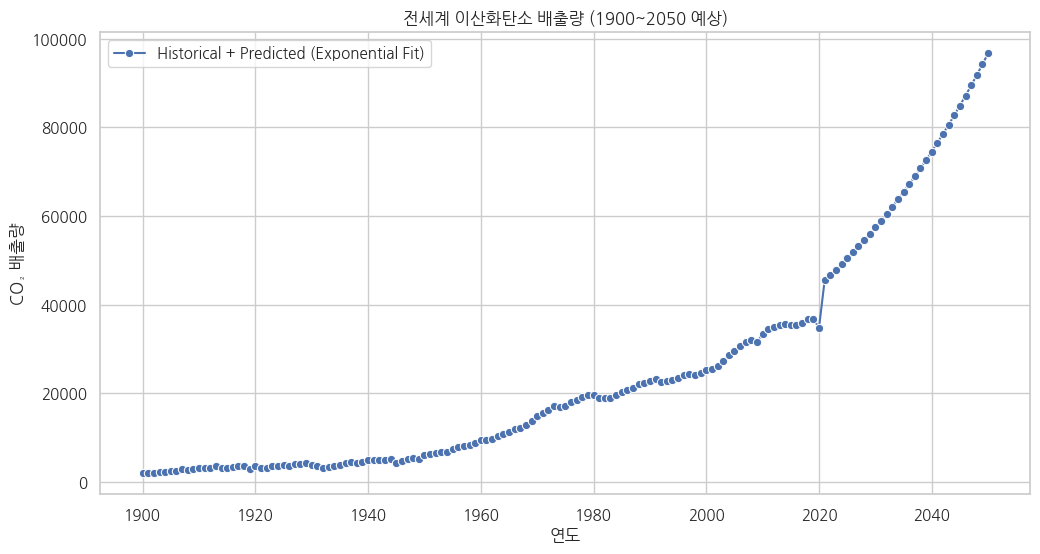

     year country           co2
141  2041   World  76495.803503
142  2042   World  78513.745115
143  2043   World  80584.919560
144  2044   World  82710.731109
145  2045   World  84892.621074
146  2046   World  87132.068792
147  2047   World  89430.592624
148  2048   World  91789.750982
149  2049   World  94211.143393
150  2050   World  96696.411576


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import koreanize_matplotlib

# 1. CSV 파일 불러오기
df = pd.read_csv('/content/owid-co2-data.csv')

# 2. 필요한 열만 사용 & 결측치 제거
required_cols = ['year', 'country', 'co2']
df_clean = df.dropna(subset=required_cols)

# 3. 연도 필터링: 1900~2020년 데이터만 사용
df_clean = df_clean[(df_clean['year'] >= 1900) & (df_clean['year'] <= 2020)]

# 4. 전 세계 배출량 추출
#    country == 'World'가 있으면 사용하고, 없으면 모든 국가 합산
if 'World' in df_clean['country'].unique():
    df_world = df_clean[df_clean['country'] == 'World'].copy()
else:
    df_world = df_clean.groupby('year', as_index=False)['co2'].sum()

# 혹시 co2가 0 이하인 행이 있으면 로그 변환에 문제가 되므로 제거
df_world = df_world[df_world['co2'] > 0]

# 5. year 기준 정렬
df_world = df_world.sort_values('year').reset_index(drop=True)

# 6. 로그 변환(Exponential Regression 준비)
df_world['log_co2'] = np.log(df_world['co2'])

# 7. 학습 데이터 준비
X = df_world[['year']]             # 독립 변수: 연도
y_log = df_world['log_co2']        # 종속 변수: log(CO₂)

# 8. 선형 회귀 모델 훈련(로그 변환된 y 사용)
model = LinearRegression()
model.fit(X, y_log)

# 9. 2021~2050년 예측
future_years = np.arange(2021, 2051).reshape(-1, 1)
predicted_log_co2 = model.predict(future_years)
predicted_co2 = np.exp(predicted_log_co2)  # 로그를 되돌려 실제 CO₂ 배출량으로 복원

# 10. 예측 결과 DataFrame 생성
df_future = pd.DataFrame({
    'year': future_years.flatten(),
    'country': 'World',
    'co2': predicted_co2
})

# 11. 과거 + 미래 데이터 합쳐서 정렬
df_final = pd.concat([df_world[['year', 'country', 'co2']], df_future], ignore_index=True)
df_final = df_final.sort_values('year').reset_index(drop=True)

# 12. 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='co2', data=df_final, marker="o", label='Historical + Predicted (Exponential Fit)')
# plt.axvline(x=2020, color='red', linestyle='--', label='2020 기준선')
plt.title('전세계 이산화탄소 배출량 (1900~2050 예상)')
plt.xlabel('연도')
plt.ylabel('CO₂ 배출량')
plt.legend()
plt.grid(True)
plt.show()

# 예측 결과 일부 확인
print(df_final.tail(10))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



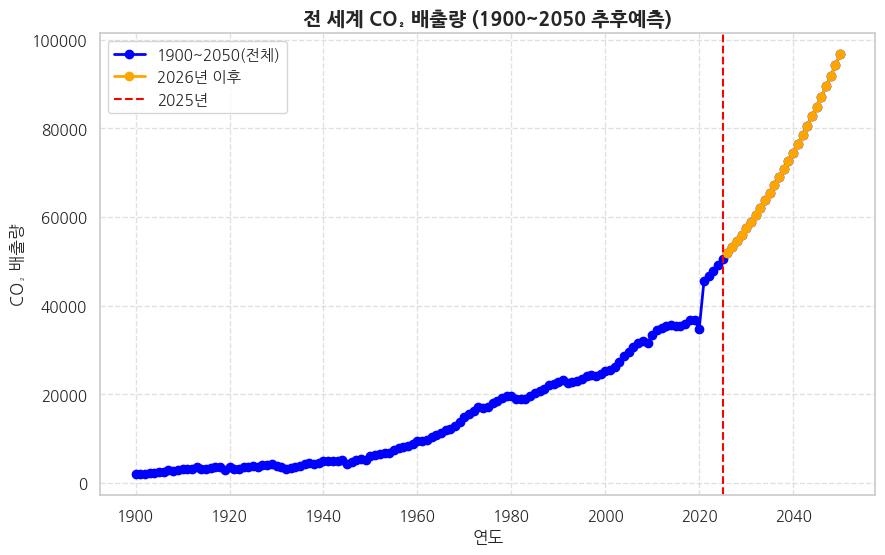

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import koreanize_matplotlib

# =========================================
# 1. 데이터 불러오기 및 기본 전처리
# =========================================
df = pd.read_csv('/content/owid-co2-data.csv')

# 필요한 열만 사용; 열이 존재하는지 확인
required_cols = ['year', 'country', 'co2', 'population']
for col in required_cols:
    if col not in df.columns:
        print(f"경고: {col} 열이 존재하지 않습니다. 일부 시각화가 정상적으로 동작하지 않을 수 있습니다.")

# 핵심 열에 결측치가 있는 행 제거
df_clean = df.dropna(subset=['year', 'country', 'co2'])

# 1900년부터 2020년까지 데이터 필터링 (초기 값이 너무 낮아 발생하는 왜곡 방지)
df_clean = df_clean[(df_clean['year'] >= 1900) & (df_clean['year'] <= 2020)]

# =========================================
# 2. 전 세계 CO₂ 배출량 추세 + 2050년 예측 (로그 변환 회귀)
# =========================================

# 전 세계 데이터 구성
if 'World' in df_clean['country'].unique():
    df_world = df_clean[df_clean['country'] == 'World'].copy()
else:
    df_world = df_clean.groupby('year', as_index=False)['co2'].sum()

df_world = df_world[df_world['co2'] > 0]  # 로그 변환을 위해 co2>0만 사용
df_world = df_world.sort_values('year').reset_index(drop=True)

# 로그 변환 회귀로 2050년까지 예측
df_world['log_co2'] = np.log(df_world['co2'])
X = df_world[['year']]
y_log = df_world['log_co2']

model = LinearRegression()
model.fit(X, y_log)

future_years = np.arange(2021, 2051).reshape(-1, 1)
predicted_log_co2 = model.predict(future_years)
predicted_co2 = np.exp(predicted_log_co2)

df_future = pd.DataFrame({'year': future_years.flatten(), 'co2': predicted_co2})
df_future = df_future.sort_values('year')

# 과거 + 예측 결합
df_hist = df_world[['year', 'co2']].copy()
df_hist['type'] = '과거'
df_future['type'] = '예측'

df_final = pd.concat([df_hist, df_future], ignore_index=True)
df_final = df_final.sort_values('year').reset_index(drop=True)

# =========================================
# 3. 시각화: 2025년까지 파란색, 2026년부터 주황색
# =========================================
plt.figure(figsize=(10, 6))

# (A) 전체 구간(1900~2050)을 파란색 선으로 그림
plt.plot(df_final['year'], df_final['co2'],
         color='blue', marker='o', linewidth=2, label='1900~2050(전체)')

# (B) 2026년 이후만 주황색으로 다시 그려서 덮어쓰기
df_after_2026 = df_final[df_final['year'] >= 2026]
plt.plot(df_after_2026['year'], df_after_2026['co2'],
         color='orange', marker='o', linewidth=2, label='2026년 이후')

# 수직선(2025년)
plt.axvline(x=2025, color='red', linestyle='--', label='2025년')

plt.title('전 세계 CO₂ 배출량 (1900~2050 추후예측)', fontsize=14, fontweight='bold')
plt.xlabel('연도', fontsize=12)
plt.ylabel('CO₂ 배출량', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


<ipython-input-23-97af2165063a>:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




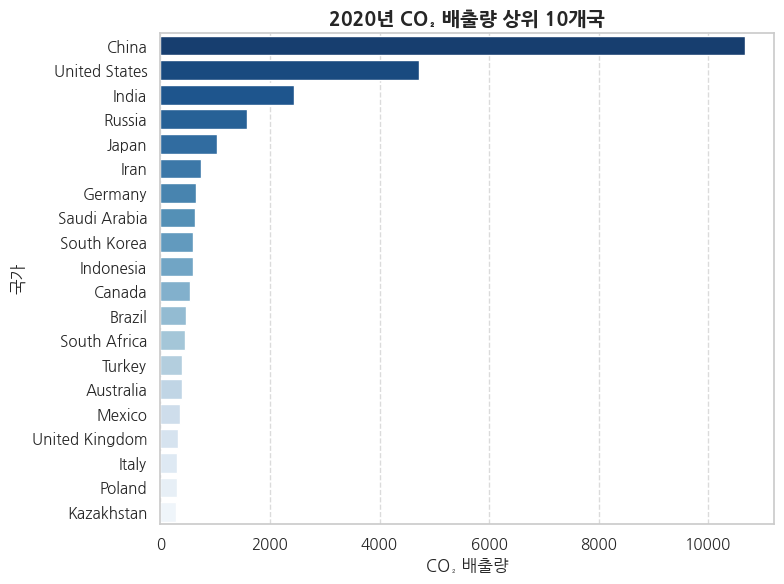

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# Seaborn 테마 및 한글 폰트 설정
sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기 및 전처리
df = pd.read_csv('/content/owid-co2-data.csv')
df = df.dropna(subset=['year', 'country', 'co2'])
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(int)

# 2. 2020년 데이터만 선택
df_2020 = df[df['year'] == 2020].copy()

# 3. 대륙/지역/소득 그룹 등 제외
exclude_list = [
    "World",
    "Asia",
    "Asia (excl. China & India)",
    "Africa",
    "Europe",
    "Europe (excl. EU-27)",
    "Europe (excl. EU-28)",
    "North America",
    "North America (excl. USA)",
    "South America",
    "Oceania",
    "European Union (27)",
    "European Union (28)",
    "High-income countries",
    "Upper-middle-income countries",
    "Lower-middle-income countries",
    "Low-income countries",
    "International transport"
]
df_2020 = df_2020[~df_2020['country'].isin(exclude_list)]

# 4. 상위 10개국 추출 (CO₂ 배출량 기준)
df_top10 = df_2020[df_2020['co2'] > 0].sort_values('co2', ascending=False).head(20)

# 5. 수평 막대 그래프 시각화
plt.figure(figsize=(8, 6))
sns.barplot(data=df_top10, x='co2', y='country', palette='Blues_r')
plt.title('2020년 CO₂ 배출량 상위 10개국', fontsize=14, fontweight='bold')
plt.xlabel('CO₂ 배출량', fontsize=12)
plt.ylabel('국가', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-24-56759c2861b4>:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




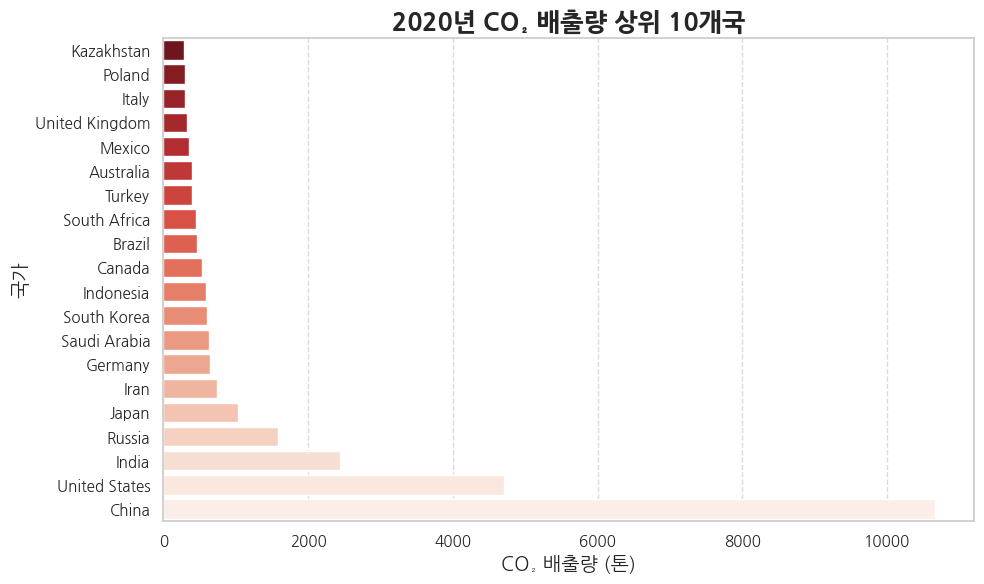

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기 및 전처리
df = pd.read_csv('/content/owid-co2-data.csv')
df = df.dropna(subset=['year', 'country', 'co2'])
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(int)

# 원하는 연도(예: 2020년) 데이터만 선택
target_year = 2020
df_2020 = df[df['year'] == target_year].copy()

# 2. 실제 국가만 남기기 위해, 대륙/소득 그룹 등 제외
exclude_list = [
    "World", "Asia", "Africa", "Europe", "North America", "South America",
    "Oceania", "European Union (27)", "European Union (28)",
    "Asia (excl. China & India)",
    "Europe (excl. EU-27)",
    "Europe (excl. EU-28)",
    "North America (excl. USA)",
    "High-income countries", "Upper-middle-income countries",
    "Lower-middle-income countries", "Low-income countries",
    "International transport"
]
df_2020 = df_2020[~df_2020['country'].isin(exclude_list)]

# 3. CO₂ 배출량 기준 상위 10개 국가 추출
df_top10 = df_2020[df_2020['co2'] > 0].sort_values('co2', ascending=False).head(20)
df_top10 = df_top10.sort_values('co2', ascending=True)  # 막대 그래프를 작은 값→큰 값 순으로 표시

# 4. 수평 막대 그래프 시각화
plt.figure(figsize=(10,6))
sns.barplot(data=df_top10, x='co2', y='country', palette='Reds_r')
plt.title(f'{target_year}년 CO₂ 배출량 상위 10개국', fontsize=18, fontweight='bold')
plt.xlabel('CO₂ 배출량 (톤)', fontsize=14)
plt.ylabel('국가', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-25-8c4ad7dbd5a3>:92: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




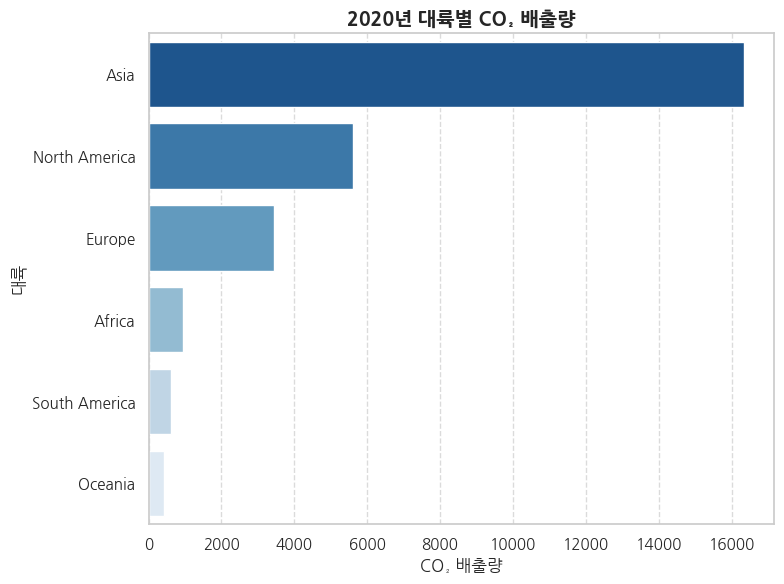

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# Seaborn 테마 및 한글 폰트 설정
sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# ------------------------------
# 1. 데이터 불러오기 및 전처리
# ------------------------------
df = pd.read_csv('/content/owid-co2-data.csv')
df = df.dropna(subset=['year', 'country', 'co2'])
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(int)

# 2020년 데이터만 선택
df_2020 = df[df['year'] == 2020].copy()

# 대륙/지역/소득 그룹 등 제거 (실제 국가만 남김)
exclude_list = [
    "World",
    "Asia", "Asia (excl. China & India)",
    "Africa",
    "Europe", "Europe (excl. EU-27)", "Europe (excl. EU-28)",
    "North America", "North America (excl. USA)",
    "South America",
    "Oceania",
    "European Union (27)", "European Union (28)",
    "High-income countries", "Upper-middle-income countries",
    "Lower-middle-income countries", "Low-income countries",
    "International transport"
]
df_2020 = df_2020[~df_2020['country'].isin(exclude_list)]

# ------------------------------
# 2. 국가 → 대륙 매핑 딕셔너리 예시
# ------------------------------
continent_mapping = {
    # 아시아
    "China": "Asia",
    "India": "Asia",
    "Japan": "Asia",
    "South Korea": "Asia",
    "Indonesia": "Asia",
    "Saudi Arabia": "Asia",
    "Turkey": "Asia",
    # 유럽
    "Russia": "Europe",
    "Germany": "Europe",
    "United Kingdom": "Europe",
    "France": "Europe",
    "Italy": "Europe",
    "Poland": "Europe",
    # 북아메리카
    "United States": "North America",
    "Canada": "North America",
    "Mexico": "North America",
    # 남아메리카
    "Brazil": "South America",
    "Argentina": "South America",
    # 아프리카
    "Egypt": "Africa",
    "South Africa": "Africa",
    "Nigeria": "Africa",
    "Algeria": "Africa",
    # 오세아니아
    "Australia": "Oceania",
    "New Zealand": "Oceania",
    # ... 필요한 국가 계속 추가 ...
}

# ------------------------------
# 3. 대륙 정보 부여 (매핑)
# ------------------------------
df_2020['continent'] = df_2020['country'].map(continent_mapping)

# 대륙 정보가 없는(매핑되지 않은) 항목은 제외하거나 'Unknown'으로 처리
df_2020 = df_2020.dropna(subset=['continent'])

# ------------------------------
# 4. 대륙별 CO₂ 배출량 집계
# ------------------------------
df_continent = df_2020.groupby('continent', as_index=False)['co2'].sum()
# CO₂ 배출량이 큰 순으로 정렬
df_continent = df_continent.sort_values('co2', ascending=False).reset_index(drop=True)

# ------------------------------
# 5. 막대 그래프 시각화 (대륙별)
# ------------------------------
plt.figure(figsize=(8, 6))
sns.barplot(data=df_continent, x='co2', y='continent', palette='Blues_r')
plt.title('2020년 대륙별 CO₂ 배출량', fontsize=14, fontweight='bold')
plt.xlabel('CO₂ 배출량', fontsize=12)
plt.ylabel('대륙', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-26-6bc45133195c>:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




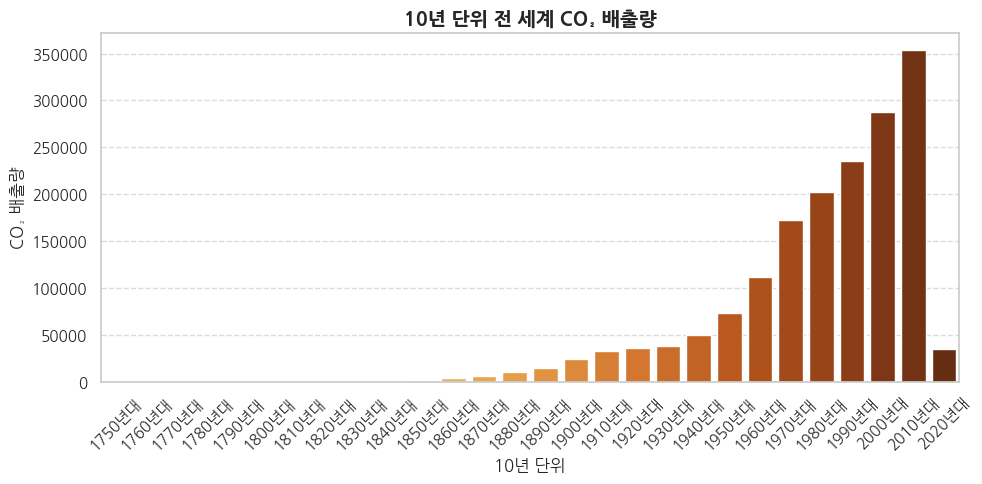

2020~2029까지의 데이터가 없어서 그렇다. 현재 2021,2022정도의 값만 들어있는거 같다.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기 및 전처리
df = pd.read_csv('/content/owid-co2-data.csv')
df = df.dropna(subset=['year', 'country', 'co2'])
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(int)

# (예) 모든 국가 합계 사용
# 실제로 'World'가 있으면 그 행만 사용, 없으면 모든 국가 합계
if 'World' in df['country'].unique():
    # "World" 행만 사용
    df_world = df[df['country'] == 'World'].copy()
    df_clean = df_world[df_world['co2'] > 0].copy()
else:
    # 모든 국가 합계
    df_clean = df.groupby('year', as_index=False)['co2'].sum()
    df_clean = df_clean[df_clean['co2'] > 0].copy()

# 2. 10년 단위 'decade' 열 생성
df_clean['decade'] = (df_clean['year'] // 10) * 10

# 3. 10년 단위 CO₂ 배출량 집계
df_decade = df_clean.groupby('decade', as_index=False)['co2'].sum()
# 혹은 mean() 대신 sum()을 사용하는지, 사용자가 의도에 따라 선택
# df_decade = df_clean.groupby('decade', as_index=False)['co2'].mean()

# 4. decade를 오름차순 정렬 & 라벨링
df_decade = df_decade.sort_values('decade').reset_index(drop=True)
# 10년 단위를 문자열로 변환하여 보이기 좋게 라벨링 (예: "1750년대")
df_decade['decade_label'] = df_decade['decade'].astype(str) + '년대'

# 필요 시 정확한 범위(예: 1750~2020)만 표시하려면 아래와 같이 필터링
# df_decade = df_decade[(df_decade['decade'] >= 1750) & (df_decade['decade'] <= 2020)]

# 5. 막대 그래프 시각화
plt.figure(figsize=(10, 5))
sns.barplot(data=df_decade, x='decade_label', y='co2', palette='YlOrBr')
plt.title('10년 단위 전 세계 CO₂ 배출량', fontsize=14, fontweight='bold')
plt.xlabel('10년 단위', fontsize=12)
plt.ylabel('CO₂ 배출량', fontsize=12)

# x축 라벨 회전 (너무 길어지는 경우)
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print('2020~2029까지의 데이터가 없어서 그렇다. 현재 2021,2022정도의 값만 들어있는거 같다.');

<ipython-input-27-787dfdea433f>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



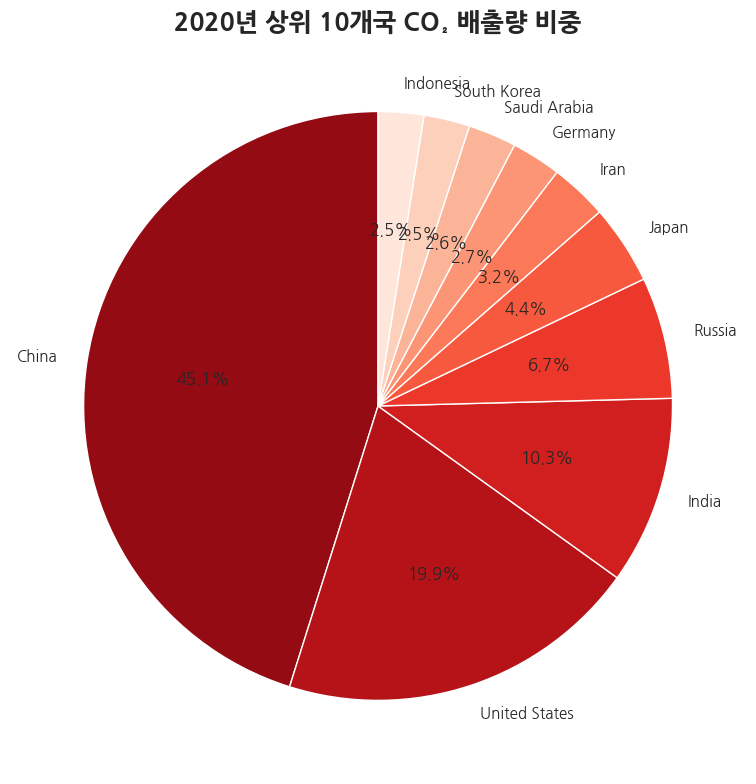

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from mpl_toolkits.mplot3d import Axes3D  # 3D 플롯용

# ------------------------------
# 1. 기본 설정 및 데이터 불러오기
# ------------------------------
sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df = pd.read_csv('/content/owid-co2-data.csv')
# 필요한 열('year', 'country', 'co2')에 결측치 제거
df = df.dropna(subset=['year', 'country', 'co2'])
# 'year'를 숫자형으로 변환 (문자열일 경우)
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)

# ------------------------------
# 2. 글로벌 추세 및 2020년 데이터 준비
# ------------------------------
# 글로벌 평균: 연도별 모든 국가의 CO₂ 배출량 평균 (대략 전 세계 추세)
df_global = df.groupby('year', as_index=False)['co2'].mean().sort_values('year')

# 2020년 데이터: 글로벌 국가별 데이터
df_2020 = df[df['year'] == 2020].copy()

# ------------------------------
# 2. 대륙/소득 그룹 등 제외
# ------------------------------

# 특정 연도(예: 2020년) 데이터 선택
target_year = 2020
df_2020 = df[df['year'] == target_year].copy()

exclude_list = [
    "World", "Asia", "Africa", "Europe", "North America", "South America",
    "Oceania", "European Union (27)", "European Union (28)",
    "High-income countries", "Upper-middle-income countries",
    "Lower-middle-income countries", "Low-income countries",
    "International transport",
    "Asia (excl. China & India)",
    "Europe (excl. EU-27)",
    "Europe (excl. EU-28)",
    "North America (excl. USA)"
]
df_2020 = df_2020[~df_2020['country'].isin(exclude_list)]

# ------------------------------
# 3. 상위 10개 국가 추출
# ------------------------------
df_top10 = df_2020.nlargest(10, 'co2').copy()

# ------------------------------
# 4. 파이 차트 (상위 10개국 비중)
# ------------------------------
plt.figure(figsize=(8,8))

# 전체 CO₂ 배출량 중 상위 10개국이 차지하는 비율
total_2020 = df_2020['co2'].sum()
df_top10['비중'] = df_top10['co2'] / total_2020 * 100

# 파이 차트
sns.set_theme(style="whitegrid", font="NanumGothic")
plt.pie(
    df_top10['비중'],
    labels=df_top10['country'],  # 국가명만 표시
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Reds_r', n_colors=10)
)
plt.title(f'{target_year}년 상위 10개국 CO₂ 배출량 비중', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Noto Sans 폰트 경로: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc


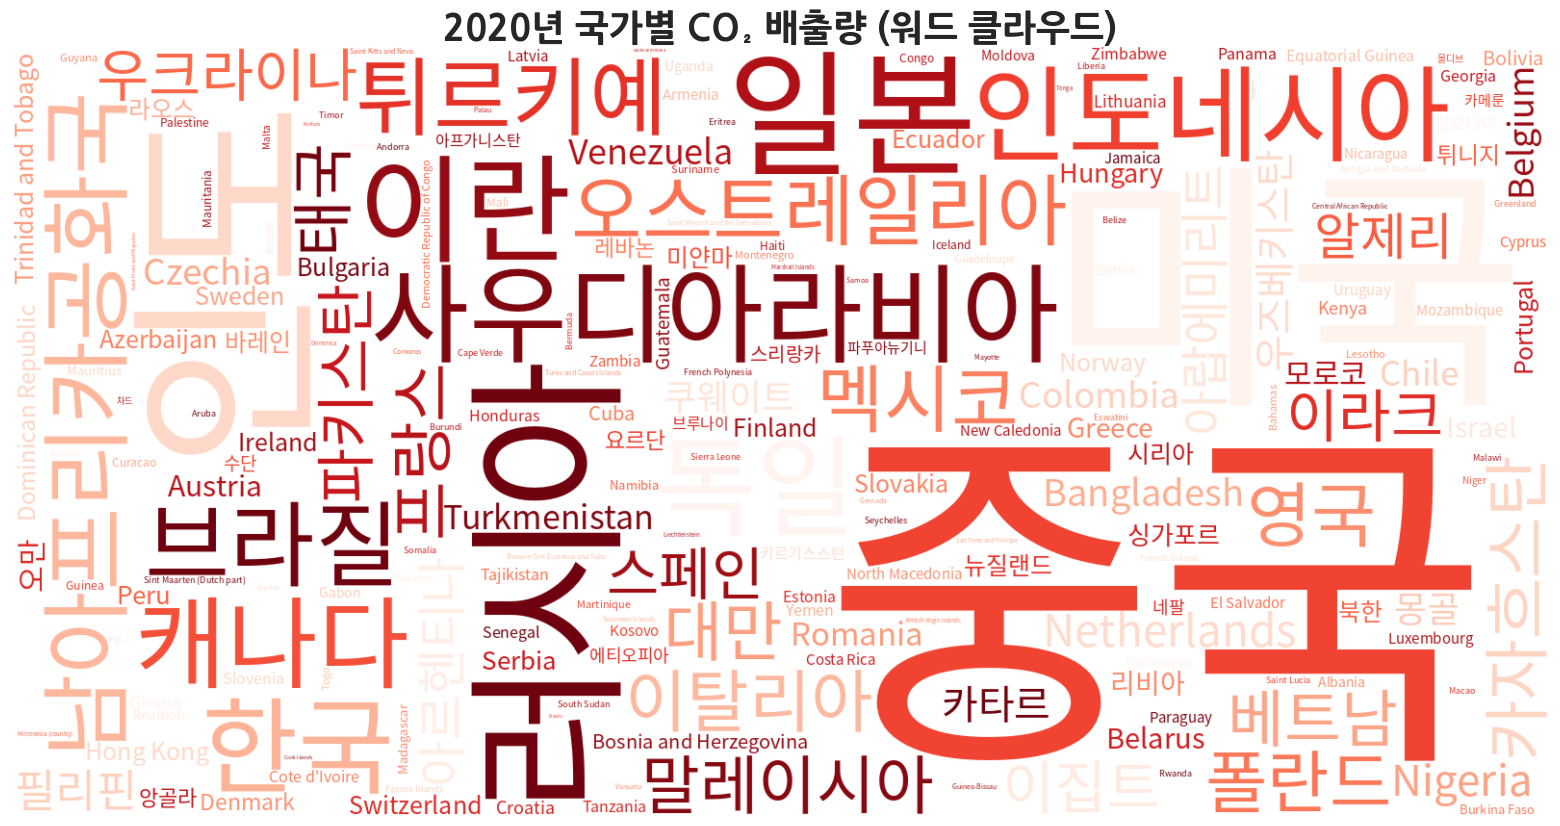

In [28]:
!pip install wordcloud

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm
import koreanize_matplotlib

#############################################
# 1. Colab에서 Noto Sans 폰트 설치
#############################################
!apt-get update -qq
!apt-get install fonts-noto-cjk -qq

font_paths = fm.findSystemFonts(fontpaths=None, fontext='ttf')
noto_font = ''
for fp in font_paths:
    if 'NotoSansCJK' in fp:
        noto_font = fp
        break

if not noto_font:
    print("Noto Sans 폰트를 찾지 못했습니다. 다른 폰트를 시도하세요.")
else:
    print("Noto Sans 폰트 경로:", noto_font)

#############################################
# 2. 데이터 불러오기 및 전처리
#############################################
df = pd.read_csv('/content/owid-co2-data.csv')
df = df.dropna(subset=['year', 'country', 'co2'])
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(int)

# 최신 연도(데이터셋의 최대 연도)만 필터링
latest_year = df['year'].max()
df_latest = df[df['year'] == latest_year].copy()

# 3. 제거할 항목(대륙, 소득 그룹, "World" 등)
exclude_list = [
    "World", "Asia", "Africa", "Europe", "North America", "South America",
    "Oceania", "European Union (27)", "European Union (28)",
    "Asia (excl. China & India)",
    "Europe (excl. EU-27)",
    "Europe (excl. EU-28)",
    "North America (excl. USA)",
    "High-income countries", "Upper-middle-income countries",
    "Lower-middle-income countries", "Low-income countries",
    "International transport",
    # 필요하면 더 추가
]
df_latest = df_latest[~df_latest['country'].isin(exclude_list)]

# 국가별 CO₂ 배출량 합계
emission_dict = df_latest.groupby('country')['co2'].sum().to_dict()

#############################################
# 4. 영어→한글 매핑 딕셔너리 (스샷 기반 확장)
#############################################
country_mapping = {
    # 스샷에서 보이는 국가/지역들 (영어 -> 한글)
    "China": "중국",
    "United States": "미국",
    "India": "인도",
    "Russia": "러시아",
    "Japan": "일본",
    "Germany": "독일",
    "United Kingdom": "영국",
    "France": "프랑스",
    "South Korea": "한국",
    "North Korea": "북한",
    "Canada": "캐나다",
    "Brazil": "브라질",
    "Indonesia": "인도네시아",
    "Saudi Arabia": "사우디아라비아",
    "Malaysia": "말레이시아",
    "Poland": "폴란드",
    "Spain": "스페인",
    "Italy": "이탈리아",
    "Kazakhstan": "카자흐스탄",
    "Kyrgyzstan": "키르기스스탄",
    "Uzbekistan": "우즈베키스탄",
    "Egypt": "이집트",
    "Mexico": "멕시코",
    "Turkey": "튀르키예",
    "Pakistan": "파키스탄",
    "Qatar": "카타르",
    "Argentina": "아르헨티나",
    "South Africa": "남아프리카공화국",
    "Iraq": "이라크",
    "Algeria": "알제리",
    "Ukraine": "우크라이나",
    "Kuwait": "쿠웨이트",
    "Nepal": "네팔",
    "Angola": "앙골라",
    "Morocco": "모로코",
    "Libya": "리비아",
    "Chad": "차드",
    "United Arab Emirates": "아랍에미리트",
    "Myanmar": "미얀마",
    "Cameroon": "카메룬",
    "Iran": "이란",
    "Ethiopia": "에티오피아",
    "Tunisia": "튀니지",
    "Sudan": "수단",
    "Bahrain": "바레인",
    "Oman": "오만",
    "Syria": "시리아",
    "Lebanon": "레바논",
    "Jordan": "요르단",
    "Afghanistan": "아프가니스탄",
    "Mongolia": "몽골",
    "Thailand": "태국",
    "Vietnam": "베트남",
    "Viet Nam": "베트남",
    "Laos": "라오스",
    "Cambodia": "캄보디아",
    "Philippines": "필리핀",
    "Nepal": "네팔",
    "Sri Lanka": "스리랑카",
    "Singapore": "싱가포르",
    "Brunei": "브루나이",
    "Maldives": "몰디브",
    "Papua New Guinea": "파푸아뉴기니",
    "Australia": "오스트레일리아",
    "New Zealand": "뉴질랜드",
    "Taiwan": "대만",
    # 필요 시 계속 추가...
}

#############################################
# 5. 영어 국가명을 한글로 변환
#############################################
emission_dict_kor = {}
for en_name, co2_val in emission_dict.items():
    kor_name = country_mapping.get(en_name, en_name)  # 매핑 없으면 영어 그대로
    emission_dict_kor[kor_name] = co2_val

#############################################
# 6. 워드 클라우드 생성
#############################################
from wordcloud import STOPWORDS

wc = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    colormap='Reds',
    font_path=noto_font if noto_font else None,
    max_words=300
)
wordcloud = wc.generate_from_frequencies(emission_dict_kor)

#############################################
# 7. 결과 시각화
#############################################
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'{latest_year}년 국가별 CO₂ 배출량 (워드 클라우드)', fontsize=26, fontweight='bold')
plt.show()


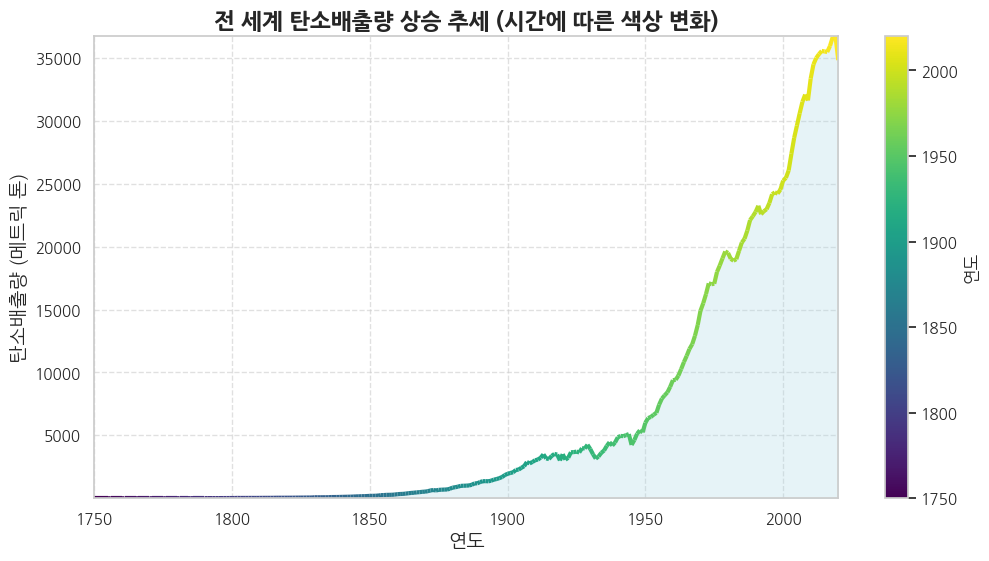

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors

# =========================================
# 1. 데이터 불러오기 및 전처리
# =========================================
# CSV 파일 불러오기
df = pd.read_csv('/content/owid-co2-data.csv')

# 필요한 열('year', 'country', 'co2')에 결측치 제거
required_cols = ['year', 'country', 'co2']
df_clean = df.dropna(subset=required_cols)

# 전 세계 데이터 구성: 'World' 값이 있다면 사용, 없으면 연도별 합계 계산
if 'World' in df_clean['country'].unique():
    df_world = df_clean[df_clean['country'] == 'World'].copy()
else:
    df_world = df_clean.groupby('year', as_index=False)['co2'].sum()

# 분석을 위해 0보다 큰 탄소배출량만 사용
df_world = df_world[df_world['co2'] > 0]
# 연도별 오름차순 정렬
df_world = df_world.sort_values('year').reset_index(drop=True)

# =========================================
# 2. 창의적인 시각화: 그라데이션 효과가 있는 면적 차트
# =========================================
# x: 연도, y: 탄소배출량
x = df_world['year'].values
y = df_world['co2'].values

# 점들을 선분으로 연결할 준비 (그라데이션 효과를 위해)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# x 값(연도)에 따라 색상이 변화하도록 정규화 및 colormap 설정
norm = plt.Normalize(x.min(), x.max())
lc = mcoll.LineCollection(segments, cmap='viridis', norm=norm, linewidth=3)
lc.set_array(x)

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 6))

# 그라데이션 선 추가
ax.add_collection(lc)
# 선의 범위를 업데이트하기 위해 투명 선을 그려줌
ax.plot(x, y, alpha=0)

# 선 아래 면적 채우기 (부드러운 느낌을 위해)
ax.fill_between(x, y, color='lightblue', alpha=0.3)

# 축 설정
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_title('전 세계 탄소배출량 상승 추세 (시간에 따른 색상 변화)', fontsize=16, fontweight='bold')
ax.set_xlabel('연도', fontsize=14)
ax.set_ylabel('탄소배출량 (메트릭 톤)', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)

# 색상 범례(컬러바) 추가: 연도를 기준으로 색상이 변화함을 표시
cb = fig.colorbar(lc, ax=ax)
cb.set_label('연도', fontsize=12)

plt.show()


In [30]:
import pandas as pd
import plotly.express as px
import numpy as np

# 1. 데이터 불러오기
df = pd.read_csv('/content/owid-co2-data.csv')

# 2. 필요한 열('year', 'iso_code', 'co2', 'country') 결측치 제거
df = df.dropna(subset=['year', 'iso_code', 'co2', 'country'])

# 3. 기간 필터링: 1750년부터 2020년까지 (원하는 연도 범위 설정)
df = df[(df['year'] >= 1750) & (df['year'] <= 2020)]

# 4. 국가별, 연도별 중복 데이터가 있을 경우 평균 CO₂ 배출량으로 집계
df_grouped = df.groupby(['year', 'iso_code', 'country'], as_index=False)['co2'].mean()

# 5. 극단값 완화를 위한 99% 분위수(quantile) 계산
#    예) 상위 1%를 초과하는 값은 모두 동일한 최댓값(색상)으로 처리
max_co2_99 = df_grouped['co2'].quantile(0.99)

# 6. 사용자 지정 색상 스케일 (5단계 예시: 분홍~빨강)
custom_scale = [
    "#fee0d2", "#fc9272", "#ef3b2c", "#cb181d", "#67000d"
]

# 7. Choropleth 시각화 (Plotly Express)
fig = px.choropleth(
    df_grouped,
    locations='iso_code',         # 국가 ISO 코드 열
    color='co2',                  # 색상으로 표시할 값 (CO₂ 배출량)
    hover_name='country',         # 마우스 오버 시 표시할 국가명
    animation_frame='year',       # 연도별 애니메이션 슬라이더 생성
    color_continuous_scale=custom_scale,
    # range_color=(0, df_grouped['co2'].max())  # 실제 최댓값 기준 (극단값이 있으면 옅게 보일 수 있음)
    range_color=(0, max_co2_99),   # 상위 1%를 잘라낸 색상 범위 설정
    title='전 세계 CO₂ 배출량 (1750년 ~ 2020년)'
)

# 8. 컬러바(색상 범례) 설정
tick_vals = [0, max_co2_99*0.25, max_co2_99*0.5, max_co2_99*0.75, max_co2_99]
tick_text = [f"{val:,.0f}" for val in tick_vals]

fig.update_layout(
    margin=dict(l=0, r=0, t=50, b=0),
    coloraxis_colorbar=dict(
        title='CO₂ 배출량 (톤)',
        tickvals=tick_vals,
        ticktext=tick_text
    )
)

fig.show()
